In [1]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
import seaborn as sb
import matplotlib.pyplot as plt 
import matplotlib
from load_results import load_setup_1, load_setup_2, PARAM_COLUMNS, RESULT_COLUMNS
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Results

In [2]:
df_full, df_params, df_results, df_to_eval = load_setup_1(False)
df_full.head()

,number,iteration,fitness_function,use_constraint,constraint_handling_method,constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,constraint_r,fitness,optimum,iterations,optimum_reached,iterations_to_opt
0,10001,1,Shubert function,False,-,-,13,5,0.5,1.5,0.1,-,0.622615,1.0,500,False,9
1,10002,1,Shubert function,False,-,-,13,5,1.0,1.0,0.1,-,0.662753,1.0,500,False,79
2,10003,1,Shubert function,False,-,-,13,5,1.5,0.5,0.1,-,0.649601,1.0,500,False,2
3,10004,1,Shubert function,False,-,-,13,5,0.5,1.5,0.5,-,0.623214,1.0,500,False,14
4,10005,1,Shubert function,False,-,-,13,5,1.0,1.0,0.5,-,0.623214,1.0,500,False,108


In [38]:
df_full_setup2, _,_,_ = load_setup_2(False)
df_full_setup2.describe()

,number,iteration,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,fitness,optimum,iterations,iterations_to_opt
count,360.000000,360.000000,360.000000,360.000000,360.0,360.0,3.600000e+02,360.000000,360.0,360.0,360.000000
mean,65002.000000,5.500000,10.333333,32.500000,0.8,1.6,3.000000e-01,0.939207,1.0,500.0,48.738889
std,34568.570597,2.876279,6.953887,29.727172,0.0,0.0,5.558841e-17,0.112424,0.0,0.0,76.620605
min,10001.000000,1.000000,2.000000,5.000000,0.8,1.6,3.000000e-01,0.494706,1.0,500.0,0.000000
25%,37501.500000,3.000000,2.000000,8.750000,0.8,1.6,3.000000e-01,0.968301,1.0,500.0,9.000000
50%,65002.000000,5.500000,10.000000,22.500000,0.8,1.6,3.000000e-01,0.999995,1.0,500.0,19.000000
75%,92502.500000,8.000000,19.000000,46.250000,0.8,1.6,3.000000e-01,1.000000,1.0,500.0,46.000000
max,120003.000000,10.000000,19.000000,80.000000,0.8,1.6,3.000000e-01,1.000000,1.0,500.0,492.000000


# Experiment Results

In [4]:
df_full[RESULT_COLUMNS].describe()

,fitness,iterations_to_opt
count,43727.000000,43727.000000
mean,0.962288,39.484941
std,0.093911,71.073509
min,0.453594,0.000000
25%,0.993621,8.000000
50%,1.000000,15.000000
75%,1.000000,38.000000
max,1.000000,499.000000


# Evaluation

In [58]:
def show_evaluation(df, feature='particle_inertia', use_constraint=False, average_constraint_handling=False, average_constraints=False, round_to=2, return_print=True):
    if isinstance(feature, list):
        features = ['fitness_function']
        features.extend(feature)
    else:
        features = ['fitness_function', feature]
    print(features)
    if use_constraint:
        if not average_constraint_handling:
            features.append('constraint_handling_method')
            
        if not average_constraints:
            features.append('constraint')
    
    if return_print:
        return df[df.use_constraint == use_constraint].groupby(by=features)[RESULT_COLUMNS].mean().round(round_to).astype(str) + " +/- " + df[df.use_constraint].groupby(features)[RESULT_COLUMNS].std().round(round_to).astype(str) + " (" + df[df.use_constraint].groupby(features)[RESULT_COLUMNS].count().astype(str) + ")"

    return df[df.use_constraint == use_constraint].groupby(by=features)[RESULT_COLUMNS].mean()

## Intense vs Diverse Configurations

In [72]:
particle_inertia_df = show_evaluation(df_full[(df_full.swarm_confidence == 1) & (df_full.personal_confidence == 1) & (df_full.particle_inertia == 0.9)], feature=[], use_constraint=False, average_constraint_handling=True, average_constraints=True, return_print=True, round_to=4)
particle_inertia_df

['fitness_function']


,fitness,optimum_reached,iterations_to_opt
fitness_function,,,
Booth's function,1.0 +/- 0.0288 (1566),1.0 +/- 0.3367 (1566),21.2759 +/- 54.2426 (1566)
Schwefel function,1.0 +/- 0.0552 (1465),1.0 +/- 0.4853 (1465),56.9655 +/- 68.5934 (1465)
Shubert function,0.8826 +/- 0.1118 (1566),0.5862 +/- 0.4628 (1566),23.1034 +/- 36.0458 (1566)


In [73]:
particle_inertia_df = show_evaluation(df_full[(df_full.swarm_confidence == 1) & (df_full.personal_confidence == 1) & (df_full.particle_inertia == 0.1)], feature=[], use_constraint=False, average_constraint_handling=True, average_constraints=True, return_print=True, round_to=4)
particle_inertia_df

['fitness_function']


,fitness,optimum_reached,iterations_to_opt
fitness_function,,,
Booth's function,0.9947 +/- 0.0372 (1566),0.4138 +/- 0.449 (1566),20.2069 +/- 66.587 (1566)
Schwefel function,0.9315 +/- 0.1164 (1466),0.2069 +/- 0.2204 (1466),83.7931 +/- 86.9781 (1466)
Shubert function,0.8788 +/- 0.122 (1566),0.5172 +/- 0.4985 (1566),41.4138 +/- 60.2491 (1566)


## Convergence Speed & Quality of Solution

In [30]:
def create_stripplot(conditions=~df_full.optimum_reached, show_colorbar=True):
    cmap = sb.color_palette("Spectral", as_cmap=True )

    # Normalize to the range of possible values from df["c"]
    norm = matplotlib.colors.Normalize(vmin=df_full["fitness"].min(), vmax=df_full["fitness"].max())
    colors = {}
    for cval in df_full["fitness"]:
        colors[cval] = cmap(norm(cval))
    
    fig, axes = plt.subplots(1,3, figsize=(13,4))
    sb.stripplot(df_full[conditions & (df_full.fitness_function == "Booth's function")], 
                 x="particle_inertia", y="iterations_to_opt", hue="fitness", palette=colors, ax=axes[0], legend=False, size=2)
    sb.boxplot(df_full[conditions & (df_full.fitness_function == "Booth's function")], 
                       x="particle_inertia", y="iterations_to_opt", ax=axes[0], notch=True,
                       fliersize=0, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},)
    axes[0].set_title("Booth's function")

    sb.stripplot(df_full[conditions & (df_full.fitness_function == "Schwefel function")], 
                 x="particle_inertia", y="iterations_to_opt", hue="fitness", palette=colors, ax=axes[1], legend=False, size=2)
    sb.boxplot(df_full[conditions & (df_full.fitness_function == "Schwefel function")], 
                       x="particle_inertia", y="iterations_to_opt", ax=axes[1], notch=True,
                       fliersize=0, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},)
    axes[1].set_title("Schwefel function")

    sb.stripplot(df_full[conditions & (df_full.fitness_function == "Shubert function")], 
                 x="particle_inertia", y="iterations_to_opt", hue="fitness", palette=colors, ax=axes[2], legend=False, size=2)
    sb.boxplot(df_full[conditions & (df_full.fitness_function == "Shubert function")], 
                       x="particle_inertia", y="iterations_to_opt", ax=axes[2], notch=True,
                       fliersize=0, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},)
    axes[2].set_title("Shubert function")
    
    if show_colorbar:
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="10%", pad=0.15)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, cmap=cmap,
                                        norm=norm,
                                        orientation='vertical')
        cb1.set_label('Fitness')
        
    return fig
    
def create_stripplot_constraint(conditions=~df_full.optimum_reached):
   
    # Normalize to the range of possible values from df["c"]
    df_selection = df_full[conditions]
    #norm = matplotlib.colors.Normalize(vmin=df_selection["constraint"].min(), vmax=df_selection["constraint"].max())
    #colors = {}
    #for cval in df_selection["constraint"]:
    #    colors[cval] = cmap(norm(cval))
    
    fig, axes = plt.subplots(1,3, figsize=(13,4))
    sb.stripplot(df_full[conditions & (df_full.fitness_function == "Booth's function")], 
                 x="particle_inertia", y="iterations_to_opt", hue="constraint", ax=axes[0], legend=False, size=2)
    sb.boxplot(df_full[conditions & (df_full.fitness_function == "Booth's function")], 
                       x="particle_inertia", y="iterations_to_opt", ax=axes[0], notch=True,
                       fliersize=0, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},)
    axes[0].set_title("Booth's function")

    sb.stripplot(df_full[conditions & (df_full.fitness_function == "Schwefel function")], 
                 x="particle_inertia", y="iterations_to_opt", hue="constraint", ax=axes[1], legend=False, size=2)
    sb.boxplot(df_full[conditions & (df_full.fitness_function == "Schwefel function")], 
                       x="particle_inertia", y="iterations_to_opt", ax=axes[1], notch=True,
                       fliersize=0, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},)
    axes[1].set_title("Schwefel function")

    p = sb.stripplot(df_full[conditions & (df_full.fitness_function == "Shubert function")], 
                 x="particle_inertia", y="iterations_to_opt", hue="constraint", ax=axes[2], legend="auto", size=2)
    sb.boxplot(df_full[conditions & (df_full.fitness_function == "Shubert function")], 
                       x="particle_inertia", y="iterations_to_opt", ax=axes[2], notch=True,
                       fliersize=0, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},)
    axes[2].set_title("Shubert function")
    
    sb.move_legend(p, "lower center", bbox_to_anchor=(-0.7, -0.4), ncol=3)
        
    return fig

def create_stripplot_fitness(conditions=~df_full.optimum_reached):
    fig, axes = plt.subplots(1,3, figsize=(13,4))
    
    sb.stripplot(df_full[conditions & (df_full.fitness_function == "Booth's function")], 
                        x="particle_inertia", y="fitness", hue="optimum_reached", ax=axes[0], legend=False, size=2)
    sb.boxplot(df_full[conditions & (df_full.fitness_function == "Booth's function")], 
                       x="particle_inertia", y="fitness", ax=axes[ 0], notch=True,
                       fliersize=0, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},)
    

    sb.stripplot(df_full[conditions & (df_full.fitness_function == "Schwefel function")], 
                        x="particle_inertia", y="fitness", hue="optimum_reached",  ax=axes[ 1], legend=False, size=2)
    sb.boxplot(df_full[conditions & (df_full.fitness_function == "Schwefel function")], 
                       x="particle_inertia", y="fitness", ax=axes[ 1], notch=True,
                       fliersize=0, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},)
   

    sb.stripplot(df_full[conditions & (df_full.fitness_function == "Shubert function")], 
                       x="particle_inertia", y="fitness", hue="optimum_reached", ax=axes[ 2], legend=False, size=2)
    sb.boxplot(df_full[conditions & (df_full.fitness_function == "Shubert function")], 
                       x="particle_inertia", y="fitness", ax=axes[ 2], notch=True,
                       fliersize=0, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},)
    

    
    return fig

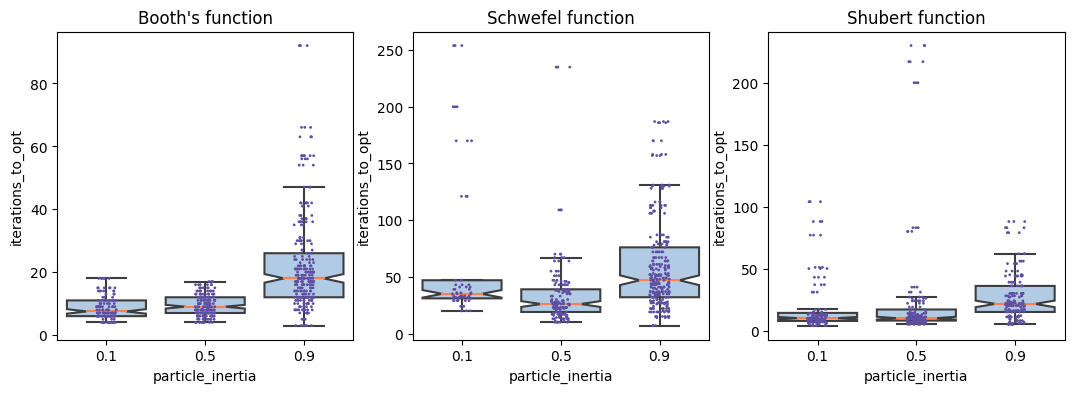

In [54]:
fig = create_stripplot(~df_full.use_constraint & df_full.optimum_reached, show_colorbar=False)

In [55]:
fig.savefig("./plots/inertia_no_const_global_opt.pdf", bbox_inches='tight')

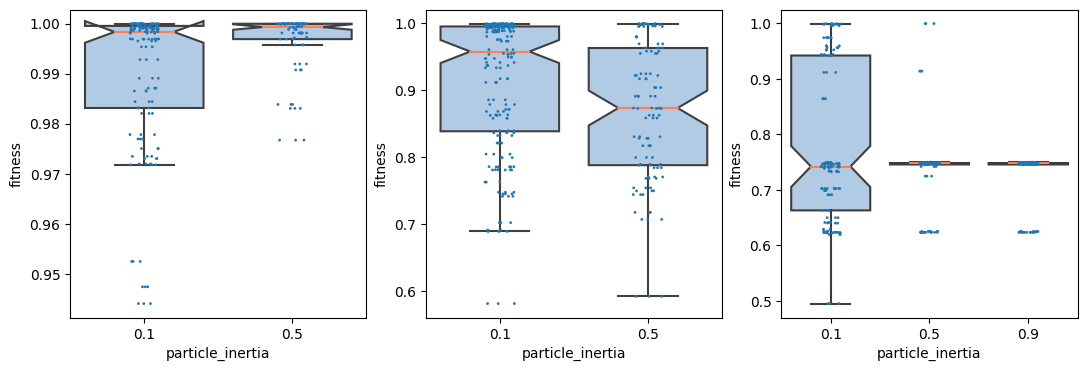

In [14]:
fig2 = create_stripplot_fitness(~df_full.use_constraint & ~df_full.optimum_reached)

In [21]:
fig2.savefig("./plots/inertia_no_const_local_opt_fitness.pdf", bbox_inches='tight')

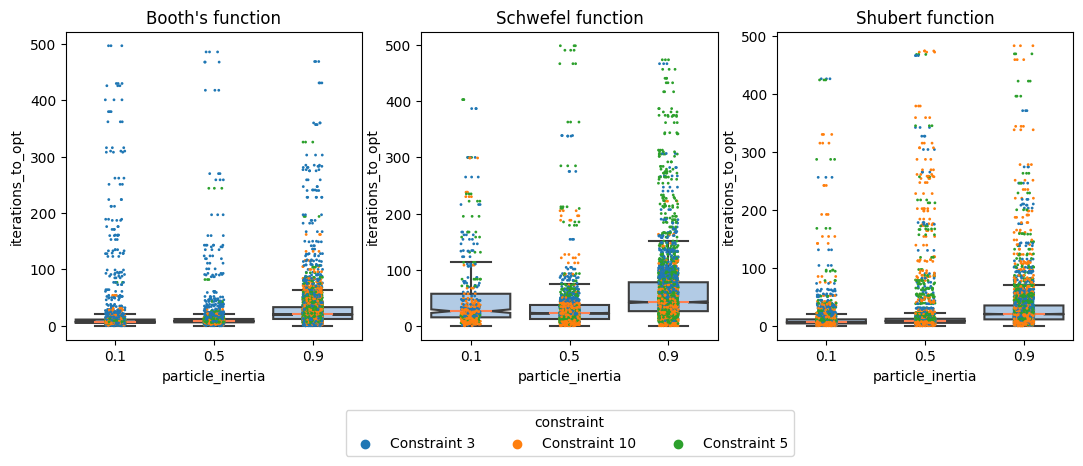

In [32]:
fig3 = create_stripplot_constraint(df_full.use_constraint & df_full.optimum_reached)

In [33]:
fig3.savefig("./plots/inertia_const_global_opt_constraint.pdf", bbox_inches='tight')

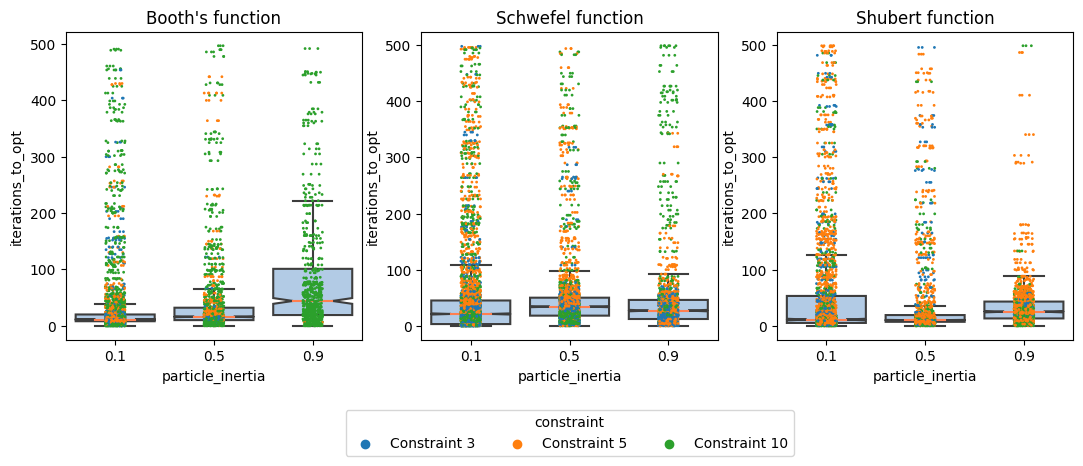

In [34]:
fig4 = create_stripplot_constraint(df_full.use_constraint & ~df_full.optimum_reached)

In [35]:
fig4.savefig("./plots/inertia_const_local_opt_constraint.pdf", bbox_inches='tight')

<AxesSubplot: xlabel='particle_inertia', ylabel='iterations_to_opt'>

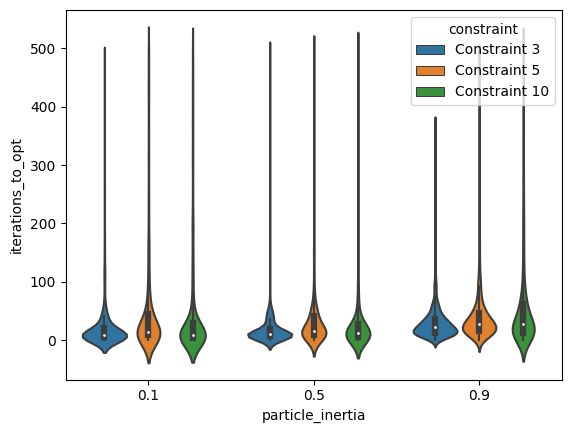

In [101]:
vp = sb.violinplot(df_full[df_full.use_constraint], x="particle_inertia", y="iterations_to_opt", hue="constraint")
vp

In [102]:
vp.get_figure().savefig("./plots/violinplot_constraint")

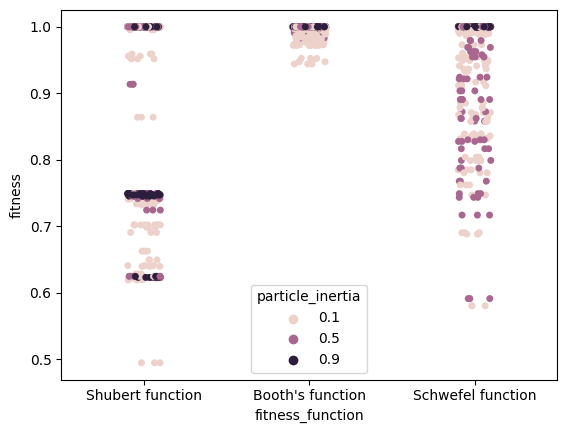

In [108]:
vp2 = sb.stripplot(df_full[~df_full.use_constraint], x="fitness_function", y="fitness", hue="particle_inertia")

In [109]:
vp2.get_figure().savefig("./plots/violinplot_inertia_no_constraint_fitness")

In [118]:
fig.savefig("./plots/stripplot_fitness_optimum_not_reached.pdf")

# Correlation

In [29]:
df_full.drop(columns=["use_constraint", "iterations", "particle_speed_limit", "optimum"]).corr().loc[['population_size', 'personal_confidence',
       'swarm_confidence', 'particle_inertia', 'fitness', 'optimum_reached',
       'iterations_to_opt'],:]

C:\Users\karst\AppData\Local\Temp\ipykernel_11104\2178947833.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_full.drop(columns=["use_constraint", "iterations", "particle_speed_limit", "optimum"]).corr().loc[['population_size', 'personal_confidence',


,number,iteration,population_size,personal_confidence,swarm_confidence,particle_inertia,fitness,optimum_reached,iterations_to_opt
population_size,0.909378,-0.109405,1.000000,-0.000006,0.000006,0.000051,0.148340,0.350672,-0.152885
personal_confidence,-0.000019,0.000004,-0.000006,1.000000,-1.000000,-0.000034,-0.003245,-0.069692,0.121138
swarm_confidence,0.000019,-0.000004,0.000006,-1.000000,1.000000,0.000034,0.003245,0.069692,-0.121138
particle_inertia,-0.000005,-0.000181,0.000051,-0.000034,0.000034,1.000000,0.058522,0.372201,0.010413
fitness,0.229010,-0.034443,0.148340,-0.003245,0.003245,0.058522,1.000000,0.217547,0.004333
optimum_reached,0.309699,-0.038491,0.350672,-0.069692,0.069692,0.372201,0.217547,1.000000,-0.140979
iterations_to_opt,-0.119586,0.014584,-0.152885,0.121138,-0.121138,0.010413,0.004333,-0.140979,1.000000


C:\Users\karst\AppData\Local\Temp\ipykernel_11104\622510696.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sb.heatmap(df_full.drop(columns=["use_constraint", "iterations", "iteration", "particle_speed_limit", "optimum"])


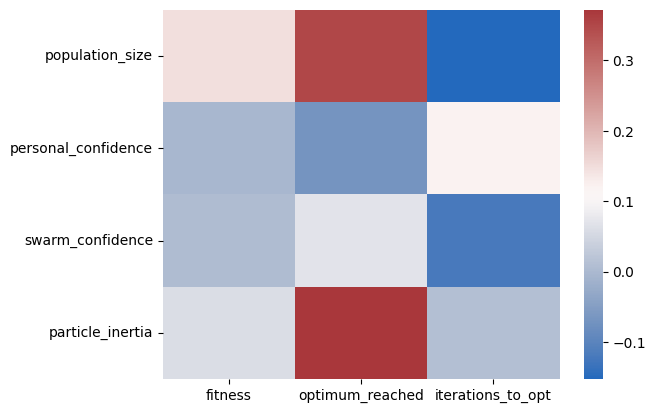

In [36]:
ax = sb.heatmap(df_full.drop(columns=["use_constraint", "iterations", "iteration", "particle_speed_limit", "optimum"])
           .corr()
           .loc[['population_size', 'personal_confidence', 'swarm_confidence', 'particle_inertia'], 
                ["fitness", "optimum_reached", "iterations_to_opt"]],
          cmap="vlag")
ax.get_figure().savefig("./plots/correlation.pdf", bbox_inches='tight')

In [97]:
df_full.reset_index()[df_full.reset_index().use_constraint].drop(columns=["fitness_function", "constraint", "constraint_handling_method"]).astype(np.float64).corr()

C:\Users\karst\AppData\Local\Temp\ipykernel_8280\3909626596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_full.reset_index()[~df_full.reset_index().use_constraint].drop(columns=["fitness_function", "constraint", "constraint_handling_method"]).corr()


,index,number,iteration,use_constraint,particle_speed_limit,population_size,personal_confidence,swarm_confidence,particle_inertia,fitness,optimum,iterations,optimum_reached,iterations_to_opt
index,1.000000,0.093768,9.762271e-01,NaN,NaN,7.643869e-02,1.026337e-04,-1.026337e-04,3.079010e-04,0.064325,NaN,NaN,0.072313,-0.037144
number,0.093768,1.000000,-1.242537e-01,NaN,NaN,9.087761e-01,1.268587e-06,-1.268587e-06,3.805760e-06,0.462849,NaN,NaN,0.518951,-0.163784
iteration,0.976227,-0.124254,1.000000e+00,NaN,NaN,-1.216650e-01,9.234697e-16,-9.769288e-16,4.899488e-17,-0.036693,NaN,NaN,-0.041030,-0.001358
use_constraint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
particle_speed_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population_size,0.076439,0.908776,-1.216650e-01,NaN,NaN,1.000000e+00,-4.357101e-17,4.787262e-16,-4.918057e-17,0.369977,NaN,NaN,0.492718,-0.203730
personal_confidence,0.000103,0.000001,9.234697e-16,NaN,NaN,-4.357101e-17,1.000000e+00,-1.000000e+00,8.950553e-18,0.012268,NaN,NaN,-0.045222,0.196965
swarm_confidence,-0.000103,-0.000001,-9.769288e-16,NaN,NaN,4.787262e-16,-1.000000e+00,1.000000e+00,-2.835819e-18,-0.012268,NaN,NaN,0.045222,-0.196965
particle_inertia,0.000308,0.000004,4.899488e-17,NaN,NaN,-4.918057e-17,8.950553e-18,-2.835819e-18,1.000000e+00,0.112600,NaN,NaN,0.410224,-0.077890
fitness,0.064325,0.462849,-3.669252e-02,NaN,NaN,3.699774e-01,1.226797e-02,-1.226797e-02,1.125996e-01,1.000000,NaN,NaN,0.634804,-0.081077


In [1]:
sb.pairplot(df_full, x_vars=["fitness", "optimum_reached", "iterations_to_opt"])

NameError: name 'sb' is not defined